In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [32]:
dados_vendas = {
    'mes': [
      'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',  'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'
    ],
    'vendas': [
       2000, 2200, 2300, 2500, 2600, 2700,
       2800, 2900, 3000, 3100, 3200, 3300
    ]
}

In [33]:
# Criando o dataframe
df_vendas = pd.DataFrame.from_dict(dados_vendas)

In [34]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     12 non-null     object
 1   vendas  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [35]:
df_vendas['mes_num'] = range(1, 13)

In [36]:
df_vendas

,mes,vendas,mes_num
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3
3,Abril,2500,4
4,Maio,2600,5
5,Junho,2700,6
6,Julho,2800,7
7,Agosto,2900,8
8,Setembro,3000,9
9,Outubro,3100,10


In [37]:
# Dividindo o conjunto de treino em duas partes
X = pd.DataFrame(df_vendas['mes_num'])
y = df_vendas['vendas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Treinando o modelo
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
# Fazer as previsões
y_pred = linear_reg.predict(X_test)

In [40]:
y_pred

array([3222.48603352, 3113.12849162, 2128.91061453])

In [ ]:
# MAE (Mean Absolute Error) - 
mae = mean_absolute_error(y_test, y_pred)
# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
# R2 Score
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 54.84171322160122
MSE: 5765.308510970324
R²: 0.9804933170681456


In [42]:
# Exibir os modelos de coeficientes
print(f"Intercept: {linear_reg.intercept_}")
print(f"Coeficiente: {linear_reg.coef_}")

Intercept: 2019.5530726256984
Coeficiente: [109.3575419]


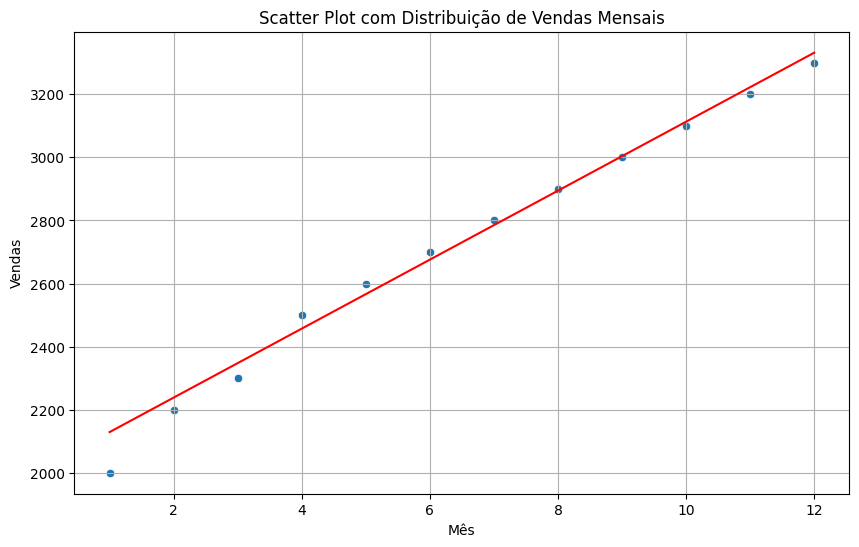

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mes_num', y='vendas', data=df_vendas)
plt.plot(df_vendas['mes_num'], linear_reg.predict(df_vendas[['mes_num']]), color='red')
plt.title('Scatter Plot com Distribuição de Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()